# 🧠 Feature Engineering in Data Science

> In every data science project, almost **90% of the time** is spent on **feature engineering**.  
> So, it is **crucial to master this skill** for building effective models.

---

## 🧩 Handling Missing Values

---

### 1. ❓ MCAR – Missing Completely At Random

**Definition:**  
The missing values are completely independent of any observed or unobserved data.  
There is **no systematic pattern** — the missingness is purely random.

**Example:**  
Missing temperature values in a dataset where the absence is unrelated to any other feature.

---

### 🔧 Handling MCAR

You can safely handle MCAR missing data using:

- ✅ **Mean/Median Imputation**  
  Replace missing values with the mean or median of the column.

- ✅ **Drop Missing Rows**  
  Remove rows with missing values — only if the proportion of missing data is **small**.

---

📝 **Note:**  
Always perform **missing data analysis** to determine whether missingness is MCAR, MAR, or MNAR before deciding on a strategy.



In [27]:
import pandas as pd
data = pd.DataFrame({'age':[25,22,28,None,29]})
data['age'] = data['age'].fillna(data['age'].mean())

In [28]:
data

,age
0,25.0
1,22.0
2,28.0
3,26.0
4,29.0


---

### 2. ❔ MAR – Missing At Random

**Definition:**  
The missingness is **related to observed data**, but **not to the value of the missing data itself**.

**Example:**  
Income values are missing based on **age**.  
The age is observed, so the missingness is **MAR**.

---

### 🔧 Handling MAR

You can handle MAR with more sophisticated imputation techniques:

- ✅ **Model-based Imputation**  
  Use other observed variables to predict missing values  
  *(e.g., regression or KNN using age)*

- ✅ **Multiple Imputation**  
  Perform repeated imputations to account for uncertainty

---

### 🛠️ Techniques:

#### 📌 Technique 1: KNN Imputation
Use **K-Nearest Neighbors** to fill in missing values based on similar rows.

#### 📌 Technique 2: Regression Imputation
Predict missing values using a **regression model** based on other features.

#### 📌 Technique 3: Multiple Imputation
Use iterative models like **`IterativeImputer`** (from `sklearn.impute`) to model and impute missing values multiple times.

---

📌 **Tip:**  
Always visualize missingness patterns (e.g., using **`missingno`** or **heatmaps**) to confirm if MAR is a valid assumption.



In [47]:
df = pd.DataFrame({
    'age': [25, 45, 30, 22, 35,27],
    'income': [50000, 80000, np.nan, np.nan, 65000,28000]
})
df

,age,income
0,25,50000.0
1,45,80000.0
2,30,NaN
3,22,NaN
4,35,65000.0
5,27,28000.0


In [49]:
#### Technique 1: KNN Imputation

from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
df_knn = pd.DataFrame(imputer.fit_transform(df),columns = df.columns)
print(" After the KNN Imputation: \n ", df_knn)

 After the KNN Imputation: 
      age        income
0  25.0  50000.000000
1  45.0  80000.000000
2  30.0  47666.666667
3  22.0  47666.666667
4  35.0  65000.000000
5  27.0  28000.000000


| Line                                    | Explanation                                                        |
| --------------------------------------- | ------------------------------------------------------------------ |
| `KNNImputer(n_neighbors=2)`             | Finds 2 most similar rows (based on non-missing values)            |
| `fit_transform(df)`                     | Learns from data (`fit`) and fills in missing values (`transform`) |
| `pd.DataFrame(..., columns=df.columns)` | Keeps column names for clarity                                     |


In [50]:
df = pd.DataFrame({
    'age': [25, 45, 30, 22, 35,27],
    'income': [50000, 80000, np.nan, np.nan, 65000,28000]
})
df

,age,income
0,25,50000.0
1,45,80000.0
2,30,NaN
3,22,NaN
4,35,65000.0
5,27,28000.0


In [51]:
#### Technique 2: Regression Imputation
from sklearn.linear_model import LinearRegression
train = df[df['income'].notnull()]
missing = df[df['income'].isnull()]
model = LinearRegression()
model.fit(train[['age']],train['income'])
predicted = model.predict(missing[['age']])
df.loc[df['income'].isnull(), 'income']= predicted
print("After Regression Imputation\n",df)

After Regression Imputation
    age        income
0   25  50000.000000
1   45  80000.000000
2   30  49435.483871
3   22  32596.774194
4   35  65000.000000
5   27  28000.000000


| Step                      | Explanation                                          |
| ------------------------- | ---------------------------------------------------- |
| Split data                | Separate known and unknown income rows               |
| `model.fit(...)`          | Train a model to learn: income = f(age)               |
| `model.predict(...)`      | Predict missing incomes using age                    |
| `df.loc[...] = predicted` | Put predicted values back into the dataset           |


In [ ]:
#### Technique 3: Multiple Imputation (Using IterativeImputer)

In [52]:
df = pd.DataFrame({
    'age': [25, 45, 30, 22, 35,27],
    'income': [50000, 80000, np.nan, np.nan, 65000,28000]
})
df

,age,income
0,25,50000.0
1,45,80000.0
2,30,NaN
3,22,NaN
4,35,65000.0
5,27,28000.0


In [54]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(random_state=0)
df_iterative = pd.DataFrame(imp.fit_transform(df),columns = df.columns)
print("\n After the Multiple Imputation (Iterative): \n",df_iterative)


 After the Multiple Imputation (Iterative): 
     age        income
0  25.0  50000.000000
1  45.0  80000.000000
2  30.0  55749.990856
3  22.0  55749.966471
4  35.0  65000.000000
5  27.0  28000.000000


| Function                         | Explanation                                                             |
| -------------------------------- | ----------------------------------------------------------------------- |
| `IterativeImputer()`             | Uses models (like linear regression) to guess missing values repeatedly |
| `fit_transform(df)`              | Fits on known data, fills in missing using iterative prediction         |
| `pd.DataFrame(..., columns=...)` | Keeps column names in the result                                        |


| Technique          | Best For              | Uses Model?   | Code Used            |
| ------------------ | --------------------- | ------------- | -------------------- |
| KNN Imputer        | Similar records exist | ❌             | `KNNImputer()`       |
| Regression Imputer | Linear relationship   | ✅             | `LinearRegression()` |
| Iterative Imputer  | Complex MAR patterns  | ✅ (Iterative) | `IterativeImputer()` |


---

### 3. 🚫 MNAR – Missing Not At Random

**Definition:**  
The missingness is **related to the value of the missing data itself**.  
In other words, the fact that a value is missing **depends on the value that's missing**.

**Example:**  
People with **high income** might choose **not to report it**.  
So, missing income values are **not random** — they depend on the unobserved income itself.

---

### 🔧 Handling MNAR

Handling MNAR is **complex** and often requires advanced strategies:

- ⚠️ **Imputation may bias results**  
  Standard imputation techniques might distort the data.

- ✅ **Model the Missingness**  
  Treat missingness as a separate feature and include it in your model.

- ✅ **Sensitivity Analysis**  
  Test how different assumptions about missing data affect your results.

- ✅ **Use Domain Knowledge**  
  Leverage expert input to make educated decisions about the missing values.

---

📌 **Note:**  
MNAR is the **most difficult** type to handle. Always assess the potential bias and uncertainty introduced by your treatment.



In [55]:
data_mnar = pd.DataFrame({
    'age': [22, 25, 30, 40, 35],
    'income': [30000, np.nan, 35000, 60000, np.nan]  # Missing for low incomes
})

print("\nMNAR Example:")
print(data_mnar)



MNAR Example:
   age   income
0   22  30000.0
1   25      NaN
2   30  35000.0
3   40  60000.0
4   35      NaN


In [56]:
data_mnar['income_missing'] = data_mnar['income'].isnull().astype(int)
data_mnar['income'] = data_mnar['income'].fillna(data_mnar['income'].median())
print("\n After Handling MNAR with Missing Indicator + Median")
print(data_mnar)


 After Handling MNAR with Missing Indicator + Meadin
   age   income  income_missing
0   22  30000.0               0
1   25  35000.0               1
2   30  35000.0               0
3   40  60000.0               0
4   35  35000.0               1


# 🚢 Titanic Survival Prediction - A Hands-On Project

In [61]:
import seaborn as sns

In [135]:
data = sns.load_dataset('titanic')

In [136]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [137]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [138]:
data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [139]:
data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [140]:
data.shape

(891, 15)

In [141]:
data.isnull().any()

survived       False
pclass         False
sex            False
age             True
sibsp          False
parch          False
fare           False
embarked        True
class          False
who            False
adult_male     False
deck            True
embark_town     True
alive          False
alone          False
dtype: bool

In [142]:
# What if i drop the null Values
data.dropna().shape

(182, 15)

---

## ⚠️ Note on Dropping Missing Data

While handling missing values, it's important to recognize the **impact on data size and quality**.

#### 🚫 Dropping Entire Rows with Nulls Can Lead to Data Reduction

- If we drop all rows containing any missing values, we may lose **a significant portion of the dataset**, which can hurt model performance and lead to bias.

---

### ✅ Better Approach: Drop Columns with Excessive Nulls

- If a **column has too many missing values**, and it's not critical for prediction, it's often better to **drop the column instead**.
- This way, we preserve the **majority of our dataset** while removing uninformative or problesh=threshold, axis=1)


---

## 🧾 MCAR Case: Dropping Columns with Missing Values

### 🧠 MCAR – Missing Completely At Random

When data is **Missing Completely At Random (MCAR)**, the missingness has **no relationship** with any other feature in the dataset..isnull().sum()


In [143]:
data.dropna(axis=1)

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,male,1,0,7.2500,Third,man,True,no,False
1,1,1,female,1,0,71.2833,First,woman,False,yes,False
2,1,3,female,0,0,7.9250,Third,woman,False,yes,True
3,1,1,female,1,0,53.1000,First,woman,False,yes,False
4,0,3,male,0,0,8.0500,Third,man,True,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,Second,man,True,no,True
887,1,1,female,0,0,30.0000,First,woman,False,yes,True
888,0,3,female,1,2,23.4500,Third,woman,False,no,False
889,1,1,male,0,0,30.0000,First,man,True,yes,True


---

## 📄 MAR Case: Imputing Missing Values

### ❔ MAR – Missing At Random

In **MAR (Missing At Random)**, the missingness is **related to other observed features**,  
but **not to the missing value itself*ted = imputer.fit_transform(df)


### 1. Mean Value Imputation

In [144]:
data.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

<!-- What Is a Distribution?
A distribution in statistics describes how values are spread or distributed across a dataset.
It answers questions like:
-Are the values centered?
-Are they spread out?
-Do most values fall in one range? -->

---

## 📊 Understanding Data Distribution

### What Is a Distribution?

A **distribution** in statistics describes **how values are spread or distributed** across a dataset.

---

### It helps answer questions like:

- **Are the values centered?**  
  Where is the central tendency (mean, median)?

- **Are they spread out?**  
  How much variability or dispersion is there (variance, standard deviation)?

- **Do most values fall in one range?**  
  Are the values skewed or concentrated around certain points?

---

Understanding distribution is key before applying visualization tools like `displot` to get meaningful insights.



---

## 🎯 Why Do We Use Distributions?

- **Understand the nature of data**  
  Is the data **normal**, **skewed**, or **uniformly** distributed?

- **Choose the right model or algorithm**  
  Some machine learning models assume **normality** or specific distributions.

- **Spot anomalies or outliers**  
  Distributions help detect unusual data points.

- **Make predictions using probability**  
  Understanding distributions enables better probabilistic modeling.

---

📌 Knowing the data distribution is fundamental to effective data analysis and modeling.


| Type              | Shape                             | Real-Life Example                           |
| ----------------- | --------------------------------- | ------------------------------------------- |
| Normal (Gaussian) | Bell-shaped, symmetric            | Heights, IQ scores                          |
| Uniform           | Flat, all values equally likely   | Rolling a fair die                          |
| Binomial          | Discrete, binary outcomes         | Coin toss (Heads/Tails)                     |
| Poisson           | Discrete, counts of rare events   | Number of emails per hour                   |
| Exponential       | Skewed right, time between events | Time between bus arrivals                   |
| Right-Skewed      | Long tail on right                | Salaries, house prices                      |
| Left-Skewed       | Long tail on left                 | Retirement age, minimum wage earners        |
| Multimodal        | More than one peak                | Mixed populations (e.g., children + adults) |


---

**Normal Distribution (Gaussian)**
- What: (Symmetric, bell-shaped curve centered around the mean)
- Why: (To model naturally occurring continuous variables)
- Where: (Used in statistical tests, regression, and standardization)

---

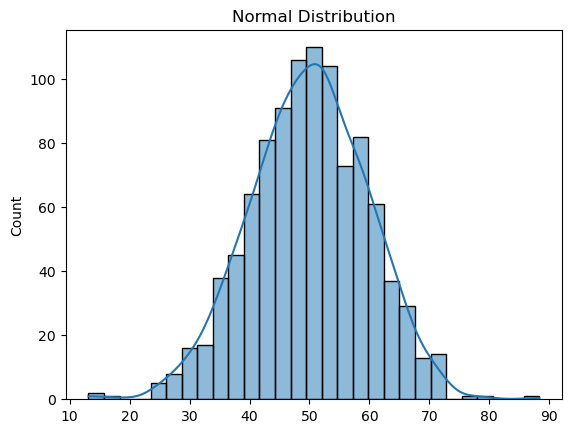

In [145]:
import numpy as np, seaborn as sns, matplotlib.pyplot as plt
data1 = np.random.normal(loc=50, scale=10, size=1000)
sns.histplot(data1, kde=True)
plt.title("Normal Distribution")
plt.show()


---

**Log-Normal Distribution**
- What: (A skewed distribution where log of data is normally distributed)
- Why: (To model positive, skewed values like income or sales)
- Where: (Used in business metrics, finance, and time modeling)

----

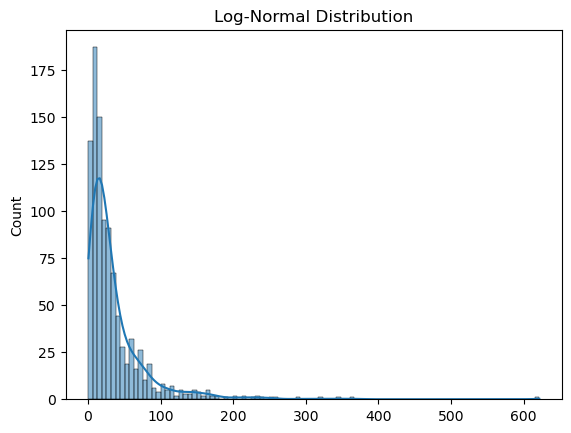

In [146]:
data2 = np.random.lognormal(mean=3, sigma=1, size=1000)
sns.histplot(data2, kde=True)
plt.title("Log-Normal Distribution")
plt.show()

---

**Exponential Distribution**
- What: (Models time between independent events occurring continuously)
- Why: (To measure waiting time until the next event)
- Where: (Used in queuing, survival analysis, customer arrival prediction)

---

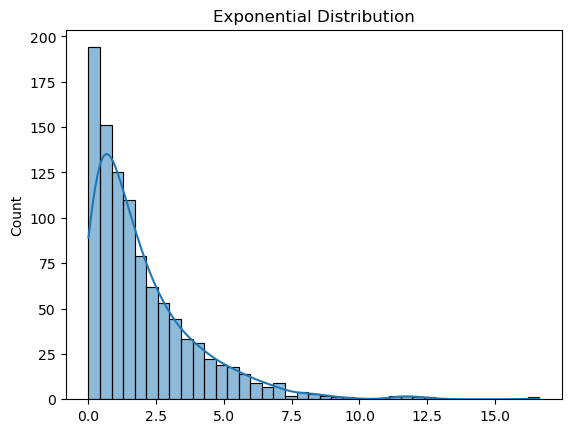

In [147]:
data3 = np.random.exponential(scale=2, size=1000)
sns.histplot(data3, kde=True)
plt.title("Exponential Distribution")
plt.show()

--- 

**Uniform Distribution**
- What: (All values have equal probability in a range)
- Why: (To generate unbiased, equally likely random samples)
- Where: (Used in simulations, bootstrapping, test data generation)

---

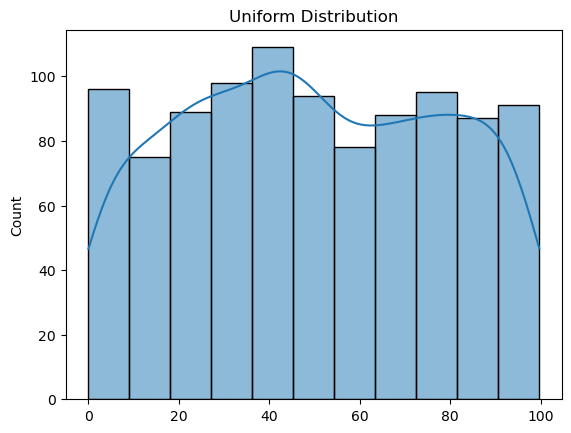

In [148]:
data4 = np.random.uniform(low=0, high=100, size=1000)
sns.histplot(data4, kde=True)
plt.title("Uniform Distribution")
plt.show()


---

**Beta Distribution**
- What: (A flexible distribution bounded between 0 and 1)
- Why: (To model probabilities or proportions)
- Where: (Used in A/B testing, Bayesian analysis, and CTR modeling)

---

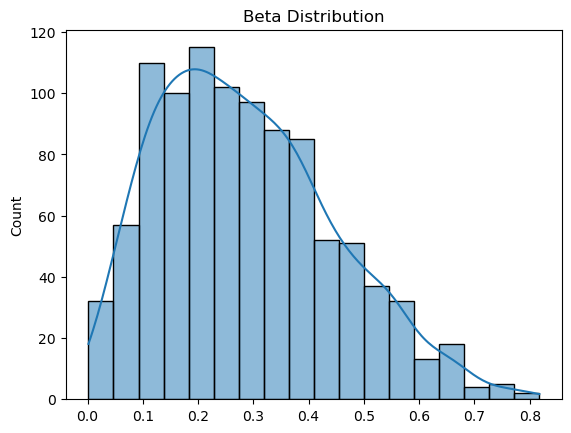

In [149]:
data5 = np.random.beta(a=2, b=5, size=1000)
sns.histplot(data5, kde=True)
plt.title("Beta Distribution")
plt.show()

- Displot is a function in the Seaborn library (Python) used for visualizing the distribution of a dataset.
- It's short for distribution plot.

| Type         | Tail Direction  | Mean vs Median | Common In            |
| ------------ | --------------- | -------------- | -------------------- |
| Normal       | None (centered) | Mean = Median  | Heights, test scores |
| Left-skewed  | Left            | Mean < Median  | Retirement age       |
| Right-skewed | Right           | Mean > Median  | Income, house prices |


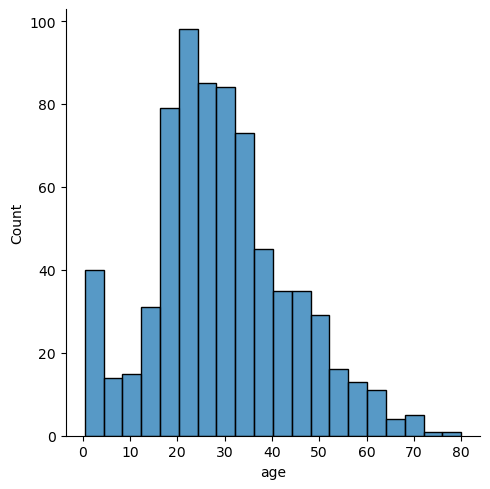

In [150]:
sns.displot(data['age'])

<Axes: xlabel='age', ylabel='Count'>

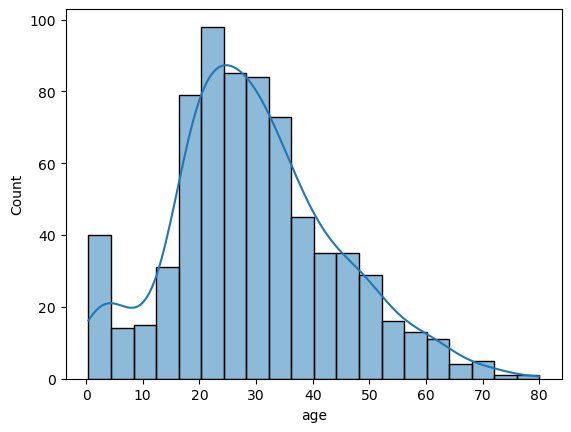

In [151]:
sns.histplot(data['age'],kde=True)

###  1. Mean Value Imputation

--- 

-  Checking Mean Imputation Works or Not replaced Nan value with Mean

In [152]:
data["avg_mean"]= data['age'].fillna(data['age'].mean())

In [153]:
data['avg_mean'].isnull().any()

False

In [154]:
# her we replaced Nan value with Mean 
data[['avg_mean','age']]

,avg_mean,age
0,22.000000,22.0
1,38.000000,38.0
2,26.000000,26.0
3,35.000000,35.0
4,35.000000,35.0
...,...,...
886,27.000000,27.0
887,19.000000,19.0
888,29.699118,NaN
889,26.000000,26.0


In [155]:
import matplotlib.pyplot as plt

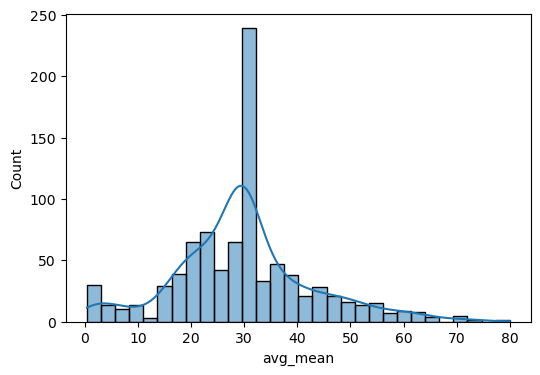

In [156]:
plt.figure(figsize=(6, 4))
sns.histplot(data['avg_mean'],kde=True)
plt.show()

### 2. Median Value Imputation

---

- Checking Median or Mean Imputation Works Better

In [157]:
data["Avg_median"] = data["age"].fillna(data["age"].median())

<Figure size 600x400 with 0 Axes>

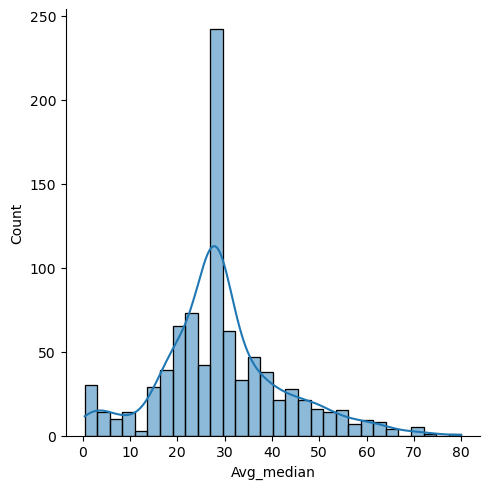

In [158]:
plt.figure(figsize=(6, 4))
sns.displot(data["Avg_median"],kde=True)
plt.show()

---

- **Conclusion**:  The age data is right-skewed, meaning a few people are much older. Using the mean to fill missing values shifts the distribution further, making it less natural. Using the median keeps the age distribution more realistic and avoids the influence of outliers — which is better for analysis and modeling

- By checking & From the conclusion median is the perfect so we can apply median Now applying

---

In [178]:
data['age'] = data['age'].fillna(data['age'].median())
data['age'].isnull().any()

False

### 3. Mode Imputation --Used when null column of Categorical value

---

- Checking Mode Imputation Works or Not

In [179]:
data.isnull().any()

survived         False
pclass           False
sex              False
age              False
sibsp            False
parch            False
fare             False
embarked          True
class            False
who              False
adult_male       False
deck              True
embark_town       True
alive            False
alone            False
avg_mean         False
Avg_median       False
mode_embarked    False
dtype: bool

----

- Next We have Embarked, Embarked is an categorical data and In that column we have null we can see above so now we can use mode Imputation

- ---

In [162]:
data['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [180]:
type(data['embarked'].mode())

pandas.core.series.Series

---

- data["mode_embarked"] = data['embarked'].fillna(data['embarked'].mode())
- Not using above beacuse mode() returns a Series , not a single value 
-  And {'embarked': ['S', 'C', 'C', 'S', 'Q', None]} Suppose this is the data set then if we apply mode we will get S and Q as the most repeated So to avoid the both cases we use Indexing of mod in the series

---

In [181]:
data["mode_embarked"] = data['embarked'].fillna(data['embarked'].mode()[0])

In [185]:
data['embarked'].mode()

0    S
Name: embarked, dtype: object

In [184]:
data['embarked'].value_counts(normalize=True)

embarked
S    0.724409
C    0.188976
Q    0.086614
Name: proportion, dtype: float64

In [183]:
data["mode_embarked"].value_counts(normalize=True)

mode_embarked
S    0.725028
C    0.188552
Q    0.086420
Name: proportion, dtype: float64

---

- **Conclusion**
- why should I conclude the data is fitted well ? 
- Before and after imputation changed only very slightly, showing the overall distribution remains stable, indicating the imputation fits well.

---
- By checking & From the conclusion Mode is the perfect so we can apply Mode Imputation Now applying
- --

In [ ]:
data['embarked'] = data['embarked'].fillna(data['embarked'].mode()[0])

In [187]:
data['embarked'].isnull().any()

False

data.isnull().any()


----

- Next We have deck - It is also a categorical Values

---

---

- Checking Mode Imputation Works or Not

In [190]:
data['deck'].unique()

[NaN, 'C', 'E', 'G', 'D', 'A', 'B', 'F']
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [191]:
data['mode_deck'] = data['deck'].fillna(data['deck'].mode()[0])

In [193]:
data['deck'].value_counts()

deck
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: count, dtype: int64

In [194]:
data['mode_deck'].value_counts()

mode_deck
C    747
B     47
D     33
E     32
A     15
F     13
G      4
Name: count, dtype: int64

---

- **Conclusion** :  From the above example we can see drastic increase After data impetation on C category
-  We shouldn't conclude that the data is fitted well just because there's a slight increase in the 'C' category. That's not enough we also need to consider the relationship with other columns. In this case, we should compare with related features such as Pclass, Fare, or Cabin, because these columns are directly associated with a passenger's deck assignment and can help ensure that the imputed values are contextually accurate.

---

- By checking & From the conclusion Mode is not perfect so we can apply Mode Imputation Not applying
-  Instead of mode impetation we are checking grouped mode imputation

---

## Grouped Mode Imputation

---

- Checking Grouped Mode Imputation Works or Not

In [200]:
data['pclass'].unique()

array([3, 1, 2], dtype=int64)

---

-  We should cheque the P class column because it is related to deck when it comes to the data set the Titanic ship the Pclass
  ---
  
| Deck    | Likely Pclass    |
| ------- | ---------------- |
| A, B, C | 1 (First class)  |
| D, E    | 2 (Second class) |
| F, G    | 3 (Third classclass

In [201]:
data['ci_deck'] = data.groupby('pclass')['deck'].transform(lambda x:x.fillna(x.mode()[0]))

In [204]:
data['ci_deck'].isnull().any()

False

In [206]:
data['ci_deck'].value_counts()

ci_deck
F    660
C    100
B     47
D     33
E     32
A     15
G      4
Name: count, dtype: int64

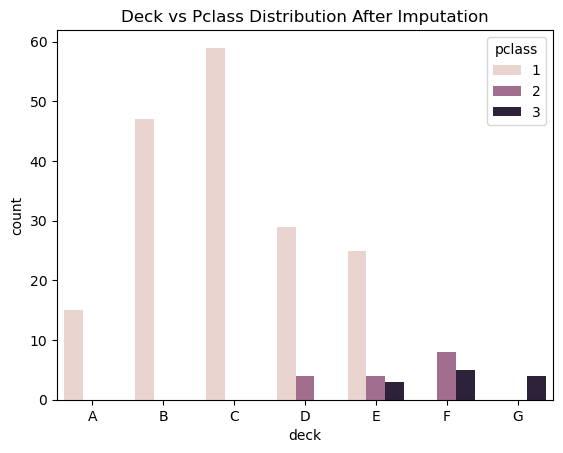

In [208]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='deck', hue='pclass', data=data)
plt.title('Deck vs Pclass Distribution After Imputation')
plt.show()


In [209]:
data[data['pclass'] == 3]['deck'].mode()


0    F
Name: deck, dtype: category
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

---

- **Conclustion** : a sudden hike in deck F after imputing with groupby('Pclass') and mode() — with 660 entries for F, while others stay relatively low.

-  By checking & From the conclusion Grouped Mode Imputation is not perfect so we can apply Grouped Mode Imputation Not applying

- Instead of Grouped Mode Imputation we are checking Random Sampling Technique

## Random Sampling Technique

---

-  Checking Random Sampling Technique Works or Not

In [243]:
def random_sample_deck(series):
    probs = series.value_counts(normalize=True)
    return series.apply(lambda x:x if pd.notna(x) else np.random.choice(probs.index, p=probs.values))
data['r_deck']=data.groupby('pclass')['deck'].transform(random_sample_deck)

In [244]:
data['r_deck'].value_counts()

r_deck
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: count, dtype: int64

In [249]:
data['r_deck'].isnull()

0       True
1      False
2       True
3      False
4       True
       ...  
886     True
887    False
888     True
889    False
890     True
Name: r_deck, Length: 891, dtype: bool

In [269]:
data.drop('g_deck',axis=1,inplace=True)

| Method                        | Result                                                                      |
| ----------------------------- | --------------------------------------------------------------------------- |
| **Simple Mode Imputation**    | Overloaded `'F'` → unrealistic and skewed distribution                      |
| ✅ **Grouped Mode Imputation** | Maintained logical distribution within each `Pclass` → **best performance** |
| **Random Sampling**           | Caused inconsistent or missing values → **not reliable**                    |


---

- By checking & From the conclusion Random Sampling Technique Not Works well conclude the Group Mode Imputation is best from all. now applying

- ---

In [251]:
data['deck'] = data.groupby('pclass')['deck'].transform(lambda x:x.fillna(x.mode()[0]))

In [252]:
data['deck'].isnull().any()

False

In [270]:
data.isnull().any()

survived       False
pclass         False
sex            False
age            False
sibsp          False
parch          False
fare           False
embarked       False
class          False
who            False
adult_male     False
deck           False
embark_town     True
alive          False
alone          False
dtype: bool

---
 
- Next, embark_town - It is also a categorical value

---

In [261]:
data['embark_town'].unique()

array(['Southampton', 'Cherbourg', 'Queenstown', nan], dtype=object)

---

- Checking Mode Imputation Works or Not

In [272]:
data['embark_town'].mode()[0]

'Southampton'

In [273]:
data['mode_embark_town'] = data['embark_town'].fillna(data['embark_town'].mode()[0])

In [276]:
data['mode_embark_town'].isnull().any()

False

In [278]:
data['embark_town'].value_counts()

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

In [274]:
data['mode_embark_town'].value_counts()

mode_embark_town
Southampton    646
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

---

- By checking & From the conclusion Mode Imputation is perfect so we can apply Mode Imputation
---

In [279]:
data['embark_town']=data['embark_town'].fillna(data['embark_town'].mode()[0])

In [280]:
data['embark_town'].isnull().any()

False

In [282]:
data.isnull().any()

survived            False
pclass              False
sex                 False
age                 False
sibsp               False
parch               False
fare                False
embarked            False
class               False
who                 False
adult_male          False
deck                False
embark_town         False
alive               False
alone               False
mode_embark_town    False
dtype: bool

In [283]:
data.drop('mode_embark_town',axis=1,inplace=True)

---

---
This is how in an Data Science project the missing values are handled with different techniques I think this one notebook gave you 100% confident that you can handle any missing value still there are many other techniques you can learn more

- ---
----